# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [119]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

sets = [heroes_df, powers_df]

[print(f"{item.info(verbose=True)}\n") for item in sets]

#print(heroes_df.info())

#print(powers_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 168 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   hero_names                    object
 1   Agility                       bool  
 2   Accelerated He

[None, None]

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [120]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)

heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [296]:
[print(f"{item.describe()}\n") for item in sets]


           Height      Weight
count  642.000000  642.000000
mean   186.119159  105.294393
std     53.157593   92.284926
min     15.200000    2.000000
25%    175.750000   70.250000
50%    183.000000   81.000000
75%    188.000000   97.000000
max    975.000000  900.000000

       Agility Accelerated Healing Lantern Power Ring Dimensional Awareness  \
count      608                 608                608                   608   
unique       2                   2                  2                     2   
top      False               False              False                 False   
freq       376                 436                597                   584   

       Cold Resistance Durability Stealth Energy Absorption Flight  \
count              608        608     608               608    608   
unique               2          2       2                 2      2   
top              False      False   False             False  False   
freq               562        360     492            

[None, None]

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




Checking for missing (NaN) values. The `Heroes` dataset has NaNs in the `Publisher` and `Weight` columns. The `Powers` dataset has no NaNs, all Boolean data types apart from name.

In [122]:
[print(f"{item.columns[item.isnull().any()]}\n") for item in sets]

#print(heroes_df.columns[heroes_df.isnull().any()])
#print(powers_df.columns[powers_df.isnull().any()])

Index(['Publisher', 'Weight'], dtype='object')

Index([], dtype='object')



[None, None]

Investigating how many mising values we have for `Heroes`.

In [123]:
heroes_df.isnull().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

Only 15 for the `Publisher` column (out of 734). Will update these with their own category of "Unknown".

In [124]:
heroes_df['Publisher'].fillna('Unknown', inplace=True)

print(heroes_df['Publisher'].value_counts())

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Unknown               15
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
ABC Studios            4
Shueisha               4
Icon Comics            4
Wildstorm              3
Sony Pictures          2
J. R. R. Tolkien       1
Hanna-Barbera          1
South Park             1
Universal Studios      1
Rebellion              1
Microsoft              1
Titan Books            1
J. K. Rowling          1
Name: Publisher, dtype: int64


Only 2 NaN for Weight, but there are a lot of values of -99, which looks like a placeholder since Weight isn't a property that can have a negative value. 239 values are placeholder or blank, which is a significant amount.

In [125]:
weights = list(heroes_df['Weight'].unique())
weights.sort()
weights

[-99.0,
 2.0,
 4.0,
 14.0,
 16.0,
 17.0,
 18.0,
 25.0,
 27.0,
 36.0,
 38.0,
 39.0,
 41.0,
 45.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 61.0,
 62.0,
 63.0,
 65.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 101.0,
 104.0,
 105.0,
 106.0,
 108.0,
 110.0,
 113.0,
 115.0,
 116.0,
 117.0,
 119.0,
 122.0,
 124.0,
 125.0,
 126.0,
 128.0,
 131.0,
 132.0,
 133.0,
 135.0,
 140.0,
 143.0,
 146.0,
 149.0,
 153.0,
 155.0,
 158.0,
 162.0,
 167.0,
 169.0,
 170.0,
 171.0,
 173.0,
 176.0,
 178.0,
 180.0,
 181.0,
 187.0,
 191.0,
 198.0,
 203.0,
 207.0,
 214.0,
 216.0,
 225.0,
 230.0,
 234.0,
 236.0,
 248.0,
 268.0,
 270.0,
 288.0,
 293.0,
 306.0,
 310.0,
 315.0,
 320.0,
 331.0,
 334.0,
 338.0,
 360.0,
 405.0,
 412.0,
 437.0,
 443.0,
 473.0,
 630.0,
 nan,
 324.0,
 356.0,
 358.0,
 383.0,
 441.0,
 495.0

For the `Weight` and `Height` columns, will first NaN the -99 values and get the median. Will impute the median, since it's too many rows of data to drop.

In [167]:
heroes_df.loc[heroes_df['Weight'] < 0, 'Weight'] = np.nan
heroes_df.loc[heroes_df['Height'] < 0, 'Height'] = np.nan

<AxesSubplot:>

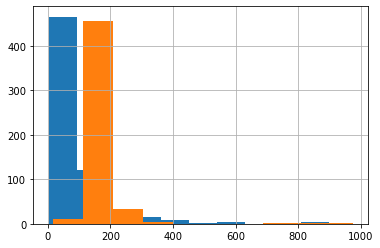

In [168]:
heroes_df['Weight'].value_counts()
heroes_df['Weight'].median()
heroes_df['Weight'].hist()

heroes_df['Height'].value_counts()
heroes_df['Height'].median()
heroes_df['Height'].hist()

<AxesSubplot:>

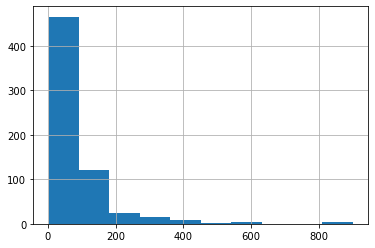

In [153]:
heroes_temp = heroes_df['Weight'].fillna(heroes_df['Weight'].median())

heroes_temp.hist()

In [157]:
heroes_df['Weight'].fillna(heroes_df['Weight'].median(), inplace=True)

In [169]:
heroes_df['Height'].fillna(heroes_df['Height'].median(), inplace=True)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [130]:
# Set index = name for heroes
heroes_df.set_index('name', inplace=True)
heroes_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
name,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,81.0


In [138]:
# Drop duplicates from both sets
heroes_df.drop_duplicates(inplace=True)
powers_df.drop_duplicates(inplace=True)

In [140]:
heroes_df.duplicated().any()
powers_df.duplicated().any()

False

In [142]:
# Perform a left join to match up the hero info with their powers in one set
heroes_powers_df = heroes_df.join(powers_df, how='left')

heroes_powers_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 642 entries, A-Bomb to Zoom
Data columns (total 176 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Gender                        object 
 1   Eye color                     object 
 2   Race                          object 
 3   Hair color                    object 
 4   Height                        float64
 5   Publisher                     object 
 6   Skin color                    object 
 7   Alignment                     object 
 8   Weight                        float64
 9   Agility                       object 
 10  Accelerated Healing           object 
 11  Lantern Power Ring            object 
 12  Dimensional Awareness         object 
 13  Cold Resistance               object 
 14  Durability                    object 
 15  Stealth                       object 
 16  Energy Absorption             object 
 17  Flight                        object 
 18  Danger Sense                

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [171]:
heroes_df['Height'].value_counts()

183.0    194
188.0     51
178.0     36
180.0     36
185.0     35
175.0     34
168.0     28
170.0     26
165.0     25
193.0     21
191.0     20
198.0     18
173.0     16
196.0     11
201.0     11
163.0      7
213.0      7
203.0      5
211.0      5
157.0      5
244.0      4
229.0      3
155.0      3
218.0      3
226.0      3
122.0      2
30.5       2
206.0      2
305.0      2
137.0      2
279.0      2
366.0      2
234.0      1
297.0      1
267.0      1
304.8      1
701.0      1
61.0       1
876.0      1
259.0      1
15.2       1
287.0      1
71.0       1
257.0      1
66.0       1
160.0      1
140.0      1
64.0       1
142.0      1
62.5       1
108.0      1
79.0       1
975.0      1
Name: Height, dtype: int64

Text(0, 0.5, 'Weight')

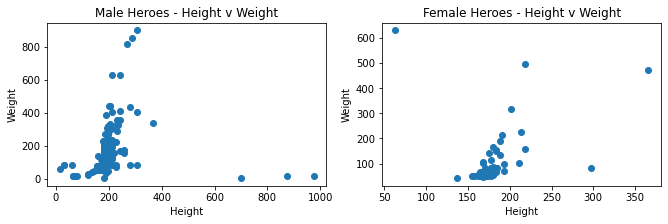

In [180]:
heroes_male_df = heroes_df[heroes_df['Gender']=='Male']
heroes_female_df = heroes_df[heroes_df['Gender']=='Female']

fig, ([ax1, ax2]) = plt.subplots(figsize=(11,3), ncols=2, nrows=1)
ax1.scatter(heroes_male_df['Height'], heroes_male_df['Weight'])
ax2.scatter(heroes_female_df['Height'], heroes_female_df['Weight'])

ax1.set_title("Male Heroes - Height v Weight")
ax1.set_xlabel("Height")
ax1.set_ylabel("Weight")

ax2.set_title("Female Heroes - Height v Weight")
ax2.set_xlabel("Height")
ax2.set_ylabel("Weight")

<AxesSubplot:xlabel='Height', ylabel='Weight'>

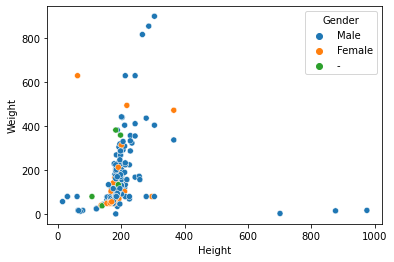

In [178]:
sns.scatterplot(x=heroes_df['Height'], y=heroes_df['Weight'], hue=heroes_df['Gender'])

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [194]:
male_heroes_df = heroes_df[heroes_df['Gender']=='Male']
female_heroes_df = heroes_df[heroes_df['Gender']=='Female']

def show_displot(dataframe, gender, column_name):
    g = sns.displot(data=dataframe[column_name])
    pass

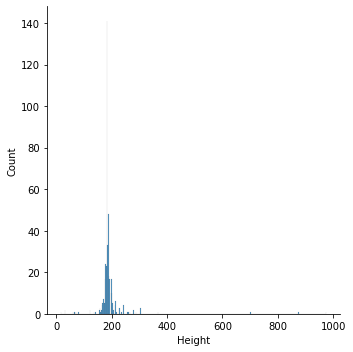

In [298]:
# Male Height
show_displot(male_heroes_df, 'Male', 'Height')

#male_heroes_df['Height'].hist()

In [299]:
#male_heroes_df['Height'].value_counts()

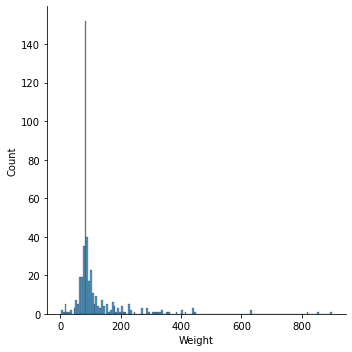

In [196]:
# Male Weight
show_displot(male_heroes_df, 'Male', 'Weight')

In [300]:
#male_heroes_df['Weight'].value_counts()

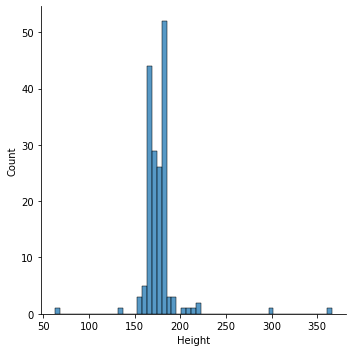

In [188]:
# Female Height
show_displot(female_heroes_df, 'Female', 'Height')

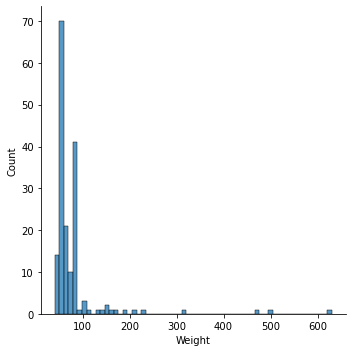

In [187]:
# Female Weight
show_displot(female_heroes_df, 'Female', 'Weight')

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [225]:
heroes_powers_df = heroes_df.join(powers_df, how='inner')

def top_trues_by_column(dataframe, column_list, top_num):
    
    power_counts = {}
    
    for col in list(column_list):
        power_counts[col] = len(dataframe[dataframe[col]])

    powers_sorted = sorted(power_counts.items(), key=lambda x: x[1], 
                           reverse=True)

    [print(f"{x[1]} heroes with {x[0]}") for x in powers_sorted[:top_num]]

In [226]:
print("All publishers top 5 abilities:")

top_trues_by_column(heroes_powers_df, list(powers_df.columns), 5)

All publishers top 5 abilities:
331 heroes with Super Strength
270 heroes with Stamina
244 heroes with Durability
236 heroes with Super Speed
222 heroes with Agility


In [227]:
print("Marvel Comics top 5 abilities:")

top_trues_by_column(
    heroes_powers_df[heroes_powers_df['Publisher']=="Marvel Comics"],
    list(powers_df.columns), 5)

Marvel Comics top 5 abilities:
192 heroes with Super Strength
145 heroes with Durability
143 heroes with Stamina
132 heroes with Super Speed
117 heroes with Agility


In [228]:
print("DC Comics top 5 abilities:")

top_trues_by_column(
    heroes_powers_df[heroes_powers_df['Publisher']=="DC Comics"],
    list(powers_df.columns), 5)

DC Comics top 5 abilities:
98 heroes with Super Strength
80 heroes with Stamina
78 heroes with Flight
74 heroes with Super Speed
66 heroes with Durability


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________

The top 5 powers for Marvel and DC compared to each other and the whole data set, are quite similar. Super Strength is the most common ability in each case, and Stamina, Super Speed, and Durability are all in the top 5 in slightly different positions.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

<AxesSubplot:>

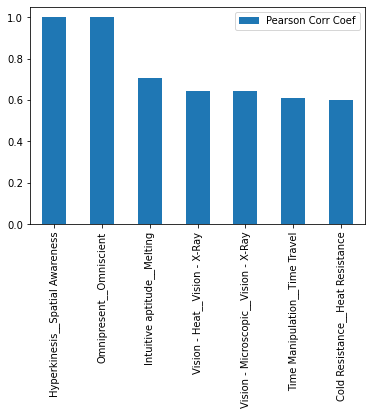

In [295]:
corr_powers = powers_df.corr()

# set values = NaN where they represent a column correlated against itself
for col in corr_powers.columns:
    corr_powers[col][col] = np.nan

corr_powers_dict = {}

# Iterate over the columns
for col in corr_powers.columns:
    # Iterate over the rows
    for row in corr_powers[col].iteritems():
        # Check for NaN
        if ~np.isnan(row[1]):
            corr_powers_dict[col + '__' + row[0]] = row[1]

# Sort powers dictionary by values (r)
corr_powers_dict_sorted = sorted(corr_powers_dict.items(), 
                                 key=lambda x: x[1], reverse=True)

# Iterate through corr_powers and remove extra pairs
final_corr_powers_dict = {}

for pair in corr_powers_dict_sorted:
    powers = [pair[0].split('__')[0], pair[0].split('__')[1]]
    powers.sort()
    final_corr_powers_dict['__'.join(powers)] = pair[1]
    
# Create dataframe from deduped powers dict
df = pd.DataFrame.from_dict(final_corr_powers_dict, orient='index', 
                            columns=['Pearson Corr Coef'])

df_sig = df[df['Pearson Corr Coef'] > 0.6]

df_sig.plot.bar()

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data